# Figures

Notebook to start making figures for Tmax paper.

Cascade Tuholske 2019-09-08

#### NOTES
There seems to be an error w/ ```CHIRTS-GHS-Events/``` whereby it is not capturing each heat event for each city or maybe not spliting them correctly.

Updated 2019-09-24 Now use ```/home/cascade/projects/data_out_urbanheat/CHIRTS-GHS-Events-Stats```

## RGB Plots

For each city:
- Total number of days per Year 
- Total number of events per year
- Avg duration of events per year
- Avg intensity per event 
- Avg intensity per year
- Severity of each event
- Avg. Severity of each event per year

To start:
- Red = # days in a given year 
- Green = avg duration in a given year
- Blue = avg intensity in a given year

#### Depdendencies

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib as mpl

#### Load and arrange data

In [2]:
# file paths

DATA_IN = '/home/cascade/projects/data_out_urbanheat/CHIRTS-GHS-Events-Stats/'
GHS_DATA_IN = '/home/CHIRTS/Tmax/cascade/GHS-UCDB/'

In [3]:
# GHS Data
GHS_fn = 'GHS_STAT_UCDB2015MT_GLOBE_R2019A_V1_0.shp'
df_ghs = gpd.read_file(GHS_DATA_IN+GHS_fn)

In [4]:
df_ghs[df_ghs['CTR_MN_NM'] == 'India'].shape

(3248, 161)

In [ ]:
# Map in city populations

# Get Pop
df_pop = pd.DataFrame()
df_pop['ID_HDC_G0'] = df_ghs['ID_HDC_G0']
df_pop['P75'] = df_ghs['P75']
df_pop['P90'] = df_ghs['P90']
df_pop['P00'] = df_ghs['P00']
df_pop['P15'] = df_ghs['P15']

df_pop.head()

In [ ]:
# stats_fn = 'CHIRTS-GHS-Events-Stats1983.csv'
# stats = pd.read_csv(DATA_IN+stats_fn)
# print(stats.shape)
# country = stats[stats['CTR_MN_NM']=='India']
# print(country.shape)
# cities = country.drop_duplicates('ID_HDC_G0', keep = 'first')
# print(cities.shape)

In [5]:
def make_stats(year, country):
    
    """ Function makes stats for plots ... ADD DETIALS LATER CPT"""
    stats_fn = 'CHIRTS-GHS-Events-Stats'+year+'.csv'
    stats = pd.read_csv(DATA_IN+stats_fn)
    print(stats.shape)
    
    # Pick a country to subset for ease
    country = stats[stats['CTR_MN_NM']==country]
    print(country.shape)
    
    # Avg intensity and duration for each city for the whole year
    avg_int = country.groupby('ID_HDC_G0')['avg_intensity'].mean()
    avg_dur = country.groupby('ID_HDC_G0')['duration'].mean()

    # Select cities and total days
    cities = pd.DataFrame()
    cities['ID_HDC_G0'] = country['ID_HDC_G0']
    cities['total_days'] = country['total_days']
    
    print(cities.shape)

    # Drop duplicates --- Removeed 
    cities = cities.drop_duplicates('ID_HDC_G0', keep = 'first')

    # Merge 
    cities = cities.merge(avg_int, on='ID_HDC_G0', how = 'inner')
    print(cities.shape)
    cities = cities.merge(avg_dur, on='ID_HDC_G0', how = 'inner')
    print(cities.shape)
    cities = cities.merge(df_pop, on = 'ID_HDC_G0', how = 'inner')
    
    print(cities.shape)
    
    return cities

### 3-D Plots

In [ ]:
# Set location and year
country_nm = 'India'
year = '2015'
pop = 'P15'

# select data for plot
cities = make_stats(year, country_nm)

# Drop cities if needed
cities = cities[cities[pop]>5*10**4]
cities.shape

In [ ]:
# 3d plots

import matplotlib

# make color map
mymap = plt.get_cmap("magma_r")

# make plot
fig = plt.figure(figsize=[20,15])
ax = plt.axes(projection='3d')

# Pop X Axis 1983
# p = ax.scatter3D(np.log10(cities1983['P75']), cities1983['avg_intensity'], cities1983['duration'], 
#              c = cities1983['total_days'], cmap = mymap)

# Pop X Axis 2015
# p = ax.scatter3D(cities['avg_intensity'], cities['duration'], c = cities['total_days'],
#              c = np.log10(cities[pop]), cmap = mymap)

# # Pop as color
p = ax.scatter3D(cities['avg_intensity'], cities['duration'], cities['total_days'], 
                 c =np.log10(cities[pop]), cmap = mymap)

# make labels
#ax.set_xlabel('Population, log10', fontsize = 18)
ax.set_xlabel('Days per year', fontsize = 18)
ax.set_ylabel('Average intensity per event, Tmax - 40.6 C', fontsize = 18)
ax.set_zlabel('Average duration of events in days', fontsize = 18)

# ax.set_xlabel('Average intensity per event, Tmax - 40.6 C')
# ax.set_ylabel('Average duration of events in days')
# ax.set_zlabel('Total numbers of days per year > 40.6 C')

# Limits
# ax.set_xlim3d(4, 7.5)
# ax.set_ylim3d(0, 10)
# ax.set_zlim3d(0, 20)

# Title
plt.title('Urban Heat Exposure for '+country_nm+' '+year, fontsize=25)

# color bar
fig.colorbar(p, ax = ax, shrink = 0.5, cmap = mymap)

plt.savefig('/home/cascade/projects/'+country_nm+year+'.png')

## Days and Population

In [6]:
# file names

DATA_IN = '/home/cascade/projects/data_out_urbanheat/'
chirts_daily_fn = '20190831_TMax-GHS_TotEvents83-2016.csv'
GHS_fn = 'GHS_STAT_UCDB2015MT_GLOBE_R2019A_V1_0.shp'

In [7]:
# Open daily and GHS_UCDB

df_chirts = pd.read_csv(DATA_IN+chirts_daily_fn)
df_ghs = gpd.read_file(GHS_DATA_IN+GHS_fn)


In [8]:
# Map in city populations

# Get Pop
df_pop = pd.DataFrame()
df_pop['ID_HDC_G0'] = df_ghs['ID_HDC_G0']
df_pop['P75'] = df_ghs['P75']
df_pop['P90'] = df_ghs['P90']
df_pop['P00'] = df_ghs['P00']
df_pop['P15'] = df_ghs['P15']

df_pop.head()

,ID_HDC_G0,P75,P90,P00,P15
0,5782,76680.403870,77349.278442,75261.170776,69023.903442
1,3316,432518.760010,399369.630417,350416.157928,281927.639362
2,5645,83301.193208,78605.444337,73295.000717,96123.248169
3,3185,59961.838394,67281.163544,73833.521271,83504.834900
4,3539,216241.069946,203083.534027,181690.372681,155063.227570


In [9]:
# merge

df_chirts_merge = pd.merge(df_pop, df_chirts, on='ID_HDC_G0', how = 'inner')


In [10]:
df_chirts_merge.head()

,ID_HDC_G0,P75,P90,P00,P15,Unnamed: 0,CTR_MN_NM,1983,1984,1985,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,4362,208910.092712,188073.401855,161281.682434,128157.266022,0,Russia,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4884,112132.820587,108378.446289,98760.031052,84903.883148,1,Russia,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,4473,480713.235840,438750.923782,377515.400574,298582.390823,2,Russia,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4502,86729.534424,80556.967285,70608.384003,57013.894836,3,Russia,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4641,87747.461609,93024.031006,90008.577820,84516.540771,4,Russia,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Make people days

df_Tpop = pd.DataFrame()
df_Tpop['ID_HDC_G0'] = df_chirts_merge['ID_HDC_G0']
df_Tpop['CTR_MN_NM'] = df_chirts_merge['CTR_MN_NM']
df_Tpop['P75'] = df_chirts_merge['P75']
df_Tpop['P90'] = df_chirts_merge['P90']
df_Tpop['P00'] = df_chirts_merge['P00']
df_Tpop['P15'] = df_chirts_merge['P15']
df_Tpop['1983'] = df_chirts_merge['1983']
df_Tpop['1990'] = df_chirts_merge['1990']
df_Tpop['2000'] = df_chirts_merge['2000']
df_Tpop['2015'] = df_chirts_merge['2015']

In [12]:
df_Tpop['PD_1983'] = df_Tpop['P75'] * df_Tpop['1983']
df_Tpop['PD_1990'] = df_Tpop['P90'] * df_Tpop['1990']
df_Tpop['PD_2000'] = df_Tpop['P00'] * df_Tpop['2000']
df_Tpop[
    'PD_2015'] = df_Tpop['P15'] * df_Tpop['2015']


In [13]:
df_Tpop[2500:2600]

,ID_HDC_G0,CTR_MN_NM,P75,P90,P00,P15,1983,1990,2000,2015,PD_1983,PD_1990,PD_2000,PD_2015
2500,11428,China,151313.624191,180821.804626,184990.786621,170883.531250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2501,11531,China,311383.498984,375082.377702,392898.051056,378537.643524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2502,6848,India,114265.215576,181382.671143,218643.872314,235628.027588,1.0,7.0,9.0,28.0,1.142652e+05,1.269679e+06,1.967795e+06,6.597585e+06
2503,10094,India,19613.737503,41933.777344,50638.237000,71062.891724,1.0,1.0,1.0,NaN,1.961374e+04,4.193378e+04,5.063824e+04,NaN
2504,3978,Egypt,24540.694153,42675.919800,52328.870117,69414.006836,11.0,5.0,4.0,30.0,2.699476e+05,2.133796e+05,2.093155e+05,2.082420e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,8394,India,26098.964844,46437.875488,55266.675293,66158.498047,3.0,3.0,1.0,12.0,7.829689e+04,1.393136e+05,5.526668e+04,7.939020e+05
2596,12593,China,119824.209682,187267.417145,233803.872742,300490.412781,1.0,NaN,1.0,NaN,1.198242e+05,NaN,2.338039e+05,NaN
2597,7318,India,154524.190277,187437.569824,181578.716858,84017.209229,23.0,32.0,28.0,43.0,3.554056e+06,5.998002e+06,5.084204e+06,3.612740e+06
2598,3966,Egypt,188502.884985,290004.112202,351349.791428,474894.187260,13.0,9.0,7.0,34.0,2.450538e+06,2.610037e+06,2.459449e+06,1.614640e+07


In [ ]:
# Write it out

# df_Tpop.to_csv(TDATA_IN+'CHIRTS-GHS-PeopleDays.csv')

#### Sum People Days and Plot it 

- Dude turn this into a function

In [79]:
year = '2015' # get Tmax events for a given year
pop_year = 'P15' # get the pop for each city
country = 'Indonesia' # pick a country

country = df_Tpop[df_Tpop['CTR_MN_NM'] == country]

pop_tot = country.groupby(year)[pop_year].sum() # group pop by tmax events and sum
pop_range = (list(range(1,len(pop_tot)+1))) # make a list of range

print(len(pop_tot))
print(len(pop_range))

test = pd.DataFrame()
test['pop_tot'] = pop_tot / 10**6
test['pop_range'] = pop_range

tot = test.pop_tot.sum()
print(tot)

1
1
0.293514799407959


In [69]:
country()

,ID_HDC_G0,CTR_MN_NM,P75,P90,P00,P15,1983,1990,2000,2015,PD_1983,PD_1990,PD_2000,PD_2015
1293,6399,India,22848.961060,72326.859604,94068.959503,126000.941772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1317,6409,India,52212.869629,81820.528809,98367.258057,126292.369629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1359,6436,India,57575.106689,96924.255981,133650.923218,189753.255737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1379,6443,India,19326.620361,33060.899170,40333.680176,52384.149414,NaN,1.0,NaN,1.0,NaN,33060.899170,NaN,52384.149414
1402,6502,India,521.603210,26897.223785,51288.826187,55009.686646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6532,8407,India,116132.184109,168137.072784,150950.665230,154218.895966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6533,8292,India,212282.764057,265390.688757,339637.830910,344804.088463,NaN,1.0,NaN,NaN,NaN,265390.688757,NaN,NaN
6547,8408,India,68993.324131,81869.106934,87882.751709,89138.018738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6555,8415,India,53276.726387,67511.313553,61345.229141,66687.775696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


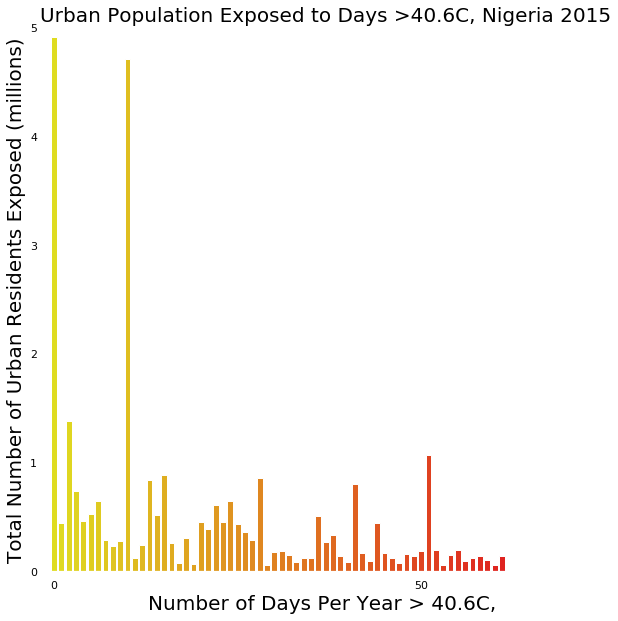

In [65]:
# make plot

sns.set(font_scale=1)
# fig, ax = plt.subplots(nrows=1, ncols=1)
fig = plt.subplots(figsize=[10,10])

ax = sns.barplot(x='pop_range', y='pop_tot', data = test, palette="autumn_r")

# Colors
ax.set_facecolor('white')

# Sent font color

# control x and y limits
plt.ylim(0, 5)
plt.xlim(-1, 75)

# Labels
plt.xlabel('Number of Days Per Year > 40.6C, ', fontsize = 20, c = 'black')
plt.ylabel('Total Number of Urban Residents Exposed (millions)', fontsize = 20, c = 'black')
plt.title('Urban Population Exposed to Days >40.6C, Nigeria '+ year, fontsize =20, c = 'black')

# ticks
tick = list(range(0,100, 50))
plt.xticks(tick, tick)
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.savefig('/home/cascade/projects/'+'peopledays Nigeria ' +year+'.png')

#transparent=True


In [ ]:
# get pop

p75 = df_Tpop.P75
p15 = df_Tpop.P15

# delta pop
delta_pop = p15 - p75

# get Tmax
tmax83 = df_Tpop['1983']
tmax15 = df_Tpop['2015']

delta_tmax = tmax15 - tmax83

# get people days
pd83 = df_Tpop['PD_1983']
pd15 = df_Tpop['PD_2015']

delta_pd = pd15 - pd83

# make df
df_delta = pd.DataFrame()
df_delta['delta_pop'] = np.log10(delta_pop)
df_delta['delta_tmax'] = delta_tmax
df_delta['delta_pd'] = np.log10(delta_pd)

In [ ]:
# make plot

sns.set(font_scale=1)
# fig, ax = plt.subplots(nrows=1, ncols=1)
fig = plt.subplots(figsize=[10,10])

ax = sns.scatterplot(x='delta_tmax', y='delta_pd', data = df_delta, alpha = 0.5)

# Colors
# ax.set_facecolor('White')

# control x and y limits
# plt.ylim(0, 8)
# plt.xlim(-25, 70)

# Labels
plt.ylabel('Log10 Change 2015 - 1983 in PeopleDays (# of days per year >40.6C x population)')
plt.xlabel('Change 2015 - 1983 in number of days >40.6C')
plt.title('Global change in People Days vs change in number of days >40.6C 1983 - 2015')


plt.axvline(x=0, color = 'black')
# plt.axhline(y=2, color = 'black')

# ticks
# tick = list(range(0,200, 50))
# plt.xticks(tick, tick)


#### All events vs all Pop by year w/ size = to People Days

- Dude turn this into a function

In [ ]:
# Get tmax
tmax83 = df_Tpop['1983']
tmax90 = df_Tpop['1990']
tmax00 = df_Tpop['2000']
tmax15 = df_Tpop['2015']

# Get People Days
pd83 = df_Tpop['PD_1983']
pd90 = df_Tpop['PD_1990']
pd00 = df_Tpop['PD_2000']
pd15 = df_Tpop['PD_2015']

# Get Pop 
p75 = df_Tpop.P75
p90 = df_Tpop.P90
p00 = df_Tpop.P00
p15 = df_Tpop.P15

In [ ]:
np.unique(p15)

In [ ]:
def make_df(tmax, pday, pop, year):
    l = len(tmax)
    year_list = [year] * l
    
    df = pd.DataFrame()
    df['events'] = tmax
    df['pop'] = np.log10(pop)
    df['pday'] = pday
    df['year'] = year_list
    
    return df

In [ ]:
# make my data
df83 = make_df(tmax83, pd83, p75, 'Year 1983')
df90 = make_df(tmax90, pd90, p90, 'Year 1990')
df00 = make_df(tmax00, pd00, p00, 'Year 2000')
df15 = make_df(tmax15, pd15, p15, 'Year 2015')

# concat it
df_concat = pd.concat([df83, df90, df00, df15])
df_concat.shape

In [ ]:
# make plot

sns.set(font_scale=1)
# fig, ax = plt.subplots(nrows=1, ncols=1)
fig = plt.subplots(figsize=[15,15])

ax = sns.scatterplot(x='pop', y='events', hue = 'year', data = df_concat, alpha = 0.7)

# Colors
ax.set_facecolor('White')

# control x and y limits
plt.ylim(0, 200)
plt.xlim(-2, 10)

# Labels
# plt.ylabel('Change in population, 1975 - 2015 (log 10)')
# plt.xlabel('Change in number of days per year >40.6, 1983 - 2015')
# plt.title('Change in number of days per year >40.6 vs. Change in Population 1983 - 2015')


# plt.axvline(x=0, color = 'black')
# # plt.axhline(y=2, color = 'black')

# ticks
# tick = list(range(0,200, 50))
# plt.xticks(tick, tick)


# Old Code

In [ ]:
# Open data

# CHIRTS-GHS Temp
year = '2015'
pop = 'P15'
stats_fn = 'CHIRTS-GHS-Events-Stats'+year+'.csv'
stats = pd.read_csv(DATA_IN+stats_fn)
print(stats.shape)

# GHS Data
GHS_fn = 'GHS_STAT_UCDB2015MT_GLOBE_R2019A_V1_0.shp'
df_ghs = gpd.read_file(GHS_DATA_IN+GHS_fn)

In [ ]:
# # Load 1983
# cities1983 = make_stats(year, country_nm)
# cities1983['year'] = '1983'

# # Load 2015
# cities2015 = make_stats('2015', country_nm)
# cities2015['year'] = '2015'

# Merge
# cities = pd.DataFrame()
# cities = cities.append(cities1983)
# print(cities.shape)
# cities = cities.append(cities2015)
# print(cities.shape)